# python AST to networkx graph 

inspired by

https://gist.github.com/joshmarlow/4001898

In [1]:
import ast
import pprint
import astpretty

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph


In [2]:
src = """
a = "hello a world"
b = "hello b world"
print(a)
if a == "h":
    print("h")
"""

In [3]:
import sys
print(sys.version)
print(sys.version_info)

3.8.7 (default, Dec 21 2020, 20:10:35) 
[GCC 7.5.0]
sys.version_info(major=3, minor=8, micro=7, releaselevel='final', serial=0)


In [4]:
ast_tree = ast.parse(src, mode='exec')
astpretty.pprint(ast_tree)

Module(
    body=[
        Assign(
            lineno=2,
            col_offset=0,
            end_lineno=2,
            end_col_offset=19,
            targets=[Name(lineno=2, col_offset=0, end_lineno=2, end_col_offset=1, id='a', ctx=Store())],
            value=Constant(lineno=2, col_offset=4, end_lineno=2, end_col_offset=19, value='hello a world', kind=None),
            type_comment=None,
        ),
        Assign(
            lineno=3,
            col_offset=0,
            end_lineno=3,
            end_col_offset=19,
            targets=[Name(lineno=3, col_offset=0, end_lineno=3, end_col_offset=1, id='b', ctx=Store())],
            value=Constant(lineno=3, col_offset=4, end_lineno=3, end_col_offset=19, value='hello b world', kind=None),
            type_comment=None,
        ),
        Expr(
            lineno=4,
            col_offset=0,
            end_lineno=4,
            end_col_offset=8,
            value=Call(
                lineno=4,
                col_offset=0,
         

In [5]:
class ASTVisitor(ast.NodeVisitor):
    def __init__(self):
        self.stack = []
        self._nxgraph = nx.DiGraph(comment='Control Flow Graph')

    def generic_visit(self, stmt):
        node_name = str(stmt)
        
        parent_name = None

        if self.stack:
            parent_name = self.stack[-1]

        self.stack.append(node_name)

        code = ast.get_source_segment(self.source_code, stmt)
        print("nn:", node_name)
        print("nt:", type(stmt) )
        print("code:", code)
        # label=code,
        self._nxgraph.add_node(node_name,  time_start = "", duration=0)
        
        if parent_name:
            self._nxgraph.add_edge(node_name, parent_name)

        super().generic_visit(stmt)

        self.stack.pop()
      
    @property
    def nxgraph(self):
        return self._nxgraph

In [6]:
#ast_add_parents(ast_tree)
#astpretty.pprint(ast_tree)
av = ASTVisitor()
av.source_code = src
#av.cfg = cfg
av.visit(ast_tree)

nn: <_ast.Module object at 0x7f0c7fcb6520>
nt: <class '_ast.Module'>
code: None
nn: <_ast.Assign object at 0x7f0c7fcb6d00>
nt: <class '_ast.Assign'>
code: a = "hello a world"
nn: <_ast.Name object at 0x7f0c7fcb6250>
nt: <class '_ast.Name'>
code: a
nn: <_ast.Store object at 0x7f0cb8f7cbb0>
nt: <class '_ast.Store'>
code: None
nn: <_ast.Constant object at 0x7f0c7fcb6ca0>
nt: <class '_ast.Constant'>
code: "hello a world"
nn: <_ast.Assign object at 0x7f0c7fcb6220>
nt: <class '_ast.Assign'>
code: b = "hello b world"
nn: <_ast.Name object at 0x7f0c7fcb60a0>
nt: <class '_ast.Name'>
code: b
nn: <_ast.Store object at 0x7f0cb8f7cbb0>
nt: <class '_ast.Store'>
code: None
nn: <_ast.Constant object at 0x7f0c7fcb6a00>
nt: <class '_ast.Constant'>
code: "hello b world"
nn: <_ast.Expr object at 0x7f0c7fcb67c0>
nt: <class '_ast.Expr'>
code: print(a)
nn: <_ast.Call object at 0x7f0c7fcb6490>
nt: <class '_ast.Call'>
code: print(a)
nn: <_ast.Name object at 0x7f0c7fd0ec70>
nt: <class '_ast.Name'>
code: print
n

In [7]:
A = to_agraph(av.nxgraph)
#print(A)

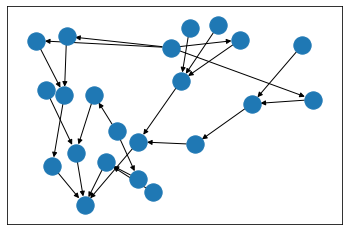

In [8]:
lab_dict = nx.get_node_attributes(av.nxgraph, 'label') 
#col_map = [col[1] for col in G.nodes.data('node_color')]

nx.draw_networkx(av.nxgraph, labels=lab_dict, with_labels=True)

nn: <_ast.Module object at 0x7f0c7a1b6940>
nt: <class '_ast.Module'>
code: None
nn: <_ast.Assign object at 0x7f0c7a1b69d0>
nt: <class '_ast.Assign'>
code: a = "hello a world"
nn: <_ast.Name object at 0x7f0c7a1b6b50>
nt: <class '_ast.Name'>
code: a
nn: <_ast.Store object at 0x7f0cb8f7cbb0>
nt: <class '_ast.Store'>
code: None
nn: <_ast.Constant object at 0x7f0c7a1b6bb0>
nt: <class '_ast.Constant'>
code: "hello a world"
nn: <_ast.Assign object at 0x7f0c7a1b6be0>
nt: <class '_ast.Assign'>
code: b = "hello b world"
nn: <_ast.Name object at 0x7f0c7a1b6c10>
nt: <class '_ast.Name'>
code: b
nn: <_ast.Store object at 0x7f0cb8f7cbb0>
nt: <class '_ast.Store'>
code: None
nn: <_ast.Constant object at 0x7f0c7a1b6c40>
nt: <class '_ast.Constant'>
code: "hello b world"
nn: <_ast.Expr object at 0x7f0c7a1b6ca0>
nt: <class '_ast.Expr'>
code: print(a)
nn: <_ast.Call object at 0x7f0c7a1b6cd0>
nt: <class '_ast.Call'>
code: print(a)
nn: <_ast.Name object at 0x7f0c7a1b6d00>
nt: <class '_ast.Name'>
code: print
n

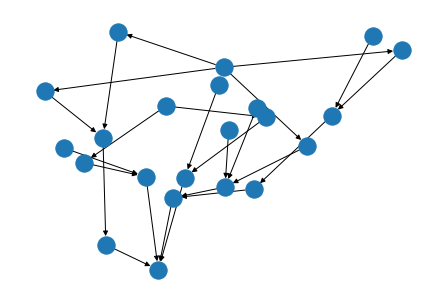

In [9]:
node = ast.parse(src)

aw = ASTVisitor()
aw.source_code = src

aw.visit(node)

nx.draw(aw.nxgraph)